In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## EDA notebook
This is a EDA Notebook doing an initial look at the data, some cleaning and just used as an initial notebook

In [2]:
df = pd.read_csv('../data/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Columns

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

convert columns to lowercapital and replace spaces with _

In [5]:
df.columns = [c.lower().replace(' ', '_') for c in df.columns]

In [6]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
len(df)

768

array([[<Axes: title={'center': 'pregnancies'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'bloodpressure'}>],
       [<Axes: title={'center': 'skinthickness'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'diabetespedigreefunction'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'outcome'}>]], dtype=object)

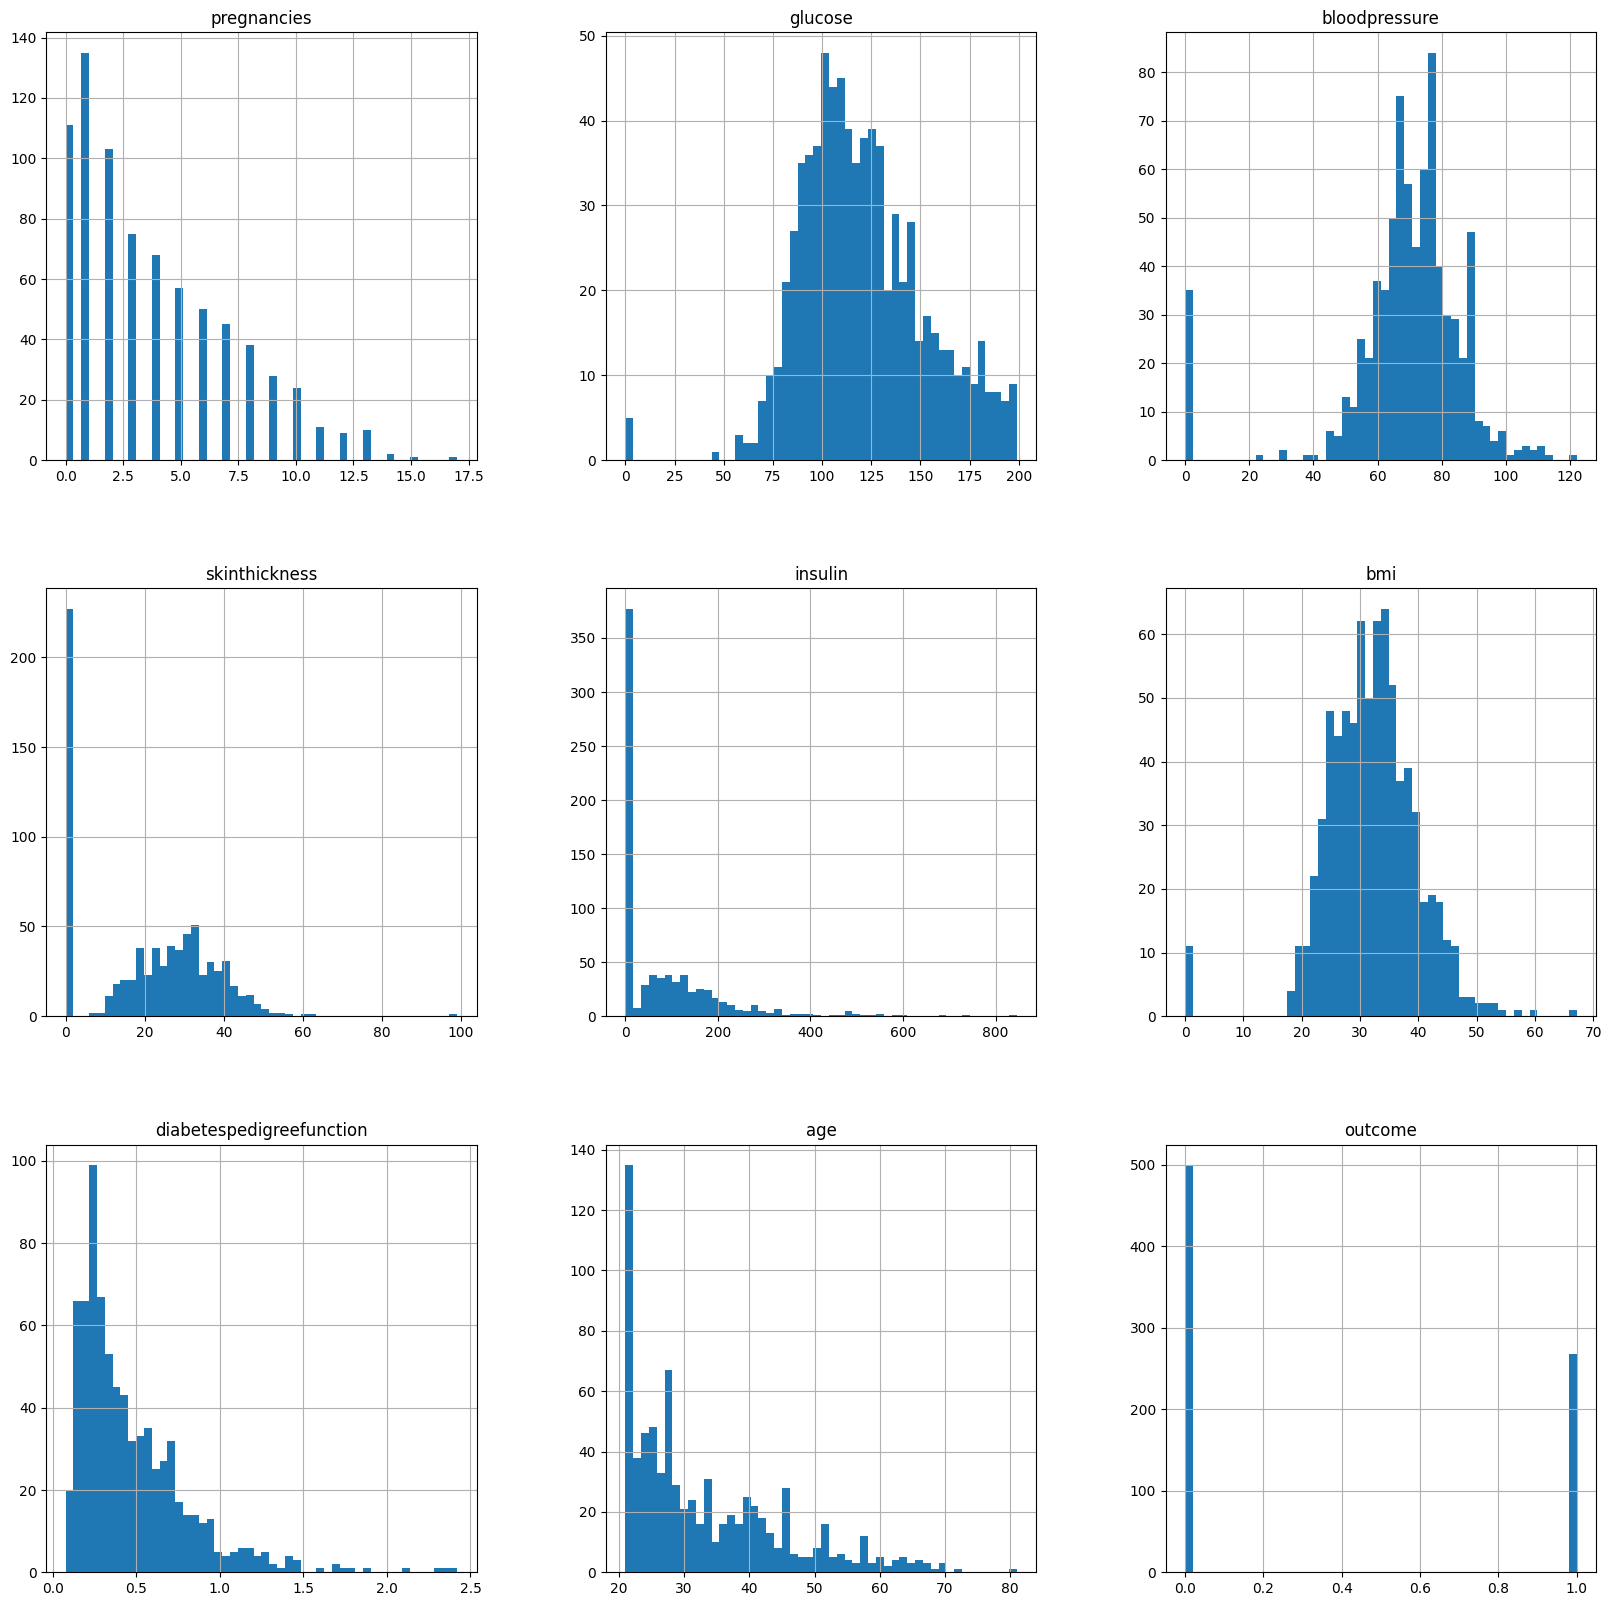

In [8]:
df.hist(bins = 50, figsize=(20,20))

<Axes: >

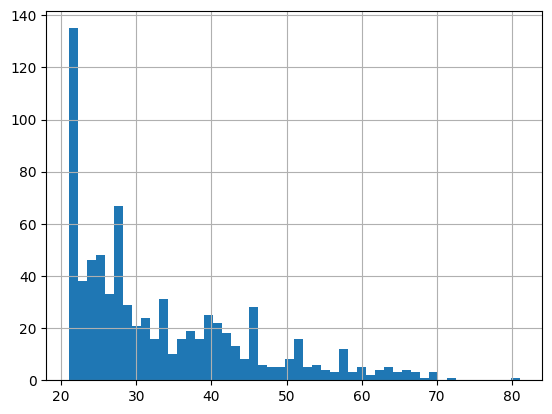

In [9]:
df['age'].hist(bins=50)

In [10]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Train a simple Linear model
The goal of this notebook is find feature importance to reduce the number of features to use and make the model as generalizable as possible. 


In [11]:
label = 'outcome'

In [12]:
X = df.drop(label,axis=1)
y = df[label]

In [13]:
X.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
model_X = scaler.fit(X)
X_scaled = model_X.transform(X)

X_train, X_test, y_train, y_test = train_test_split (X_scaled, y, random_state=42, test_size=0.3, shuffle=True)

In [16]:
len(X_train), len(X_test)

(537, 231)

In [17]:
#importing necessary libraries to perform logistic regression
from sklearn import datasets, linear_model, metrics

log_reg = linear_model.LogisticRegression(solver = 'lbfgs', max_iter = 1000)

#train the model using training set
log_reg.fit(X_train, y_train)

#making predictions on the testing set
y_pred = log_reg.predict(X_test)

#printing accuracy of algorithm
print("Logistic Regression Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Logistic Regression Model Accuracy (in %): 73.59307359307358


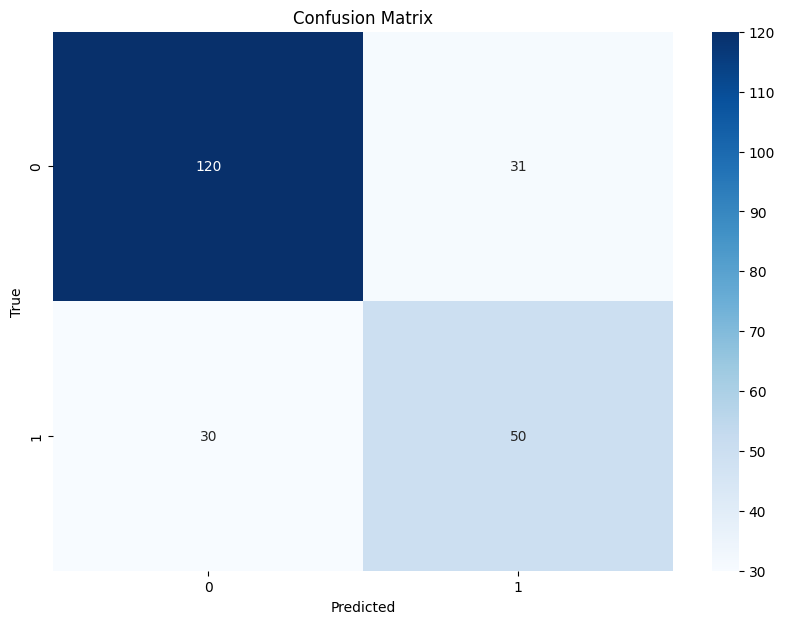

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Step 5: Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Step 4: Extract feature importance (coefficients)
feature_importance = pd.Series(log_reg.coef_.mean(axis=0), index=X.columns)

# Step 5: Sort the feature importance for better visualization
feature_importance = feature_importance.sort_values(ascending=False)

/var/folders/s8/tqf9wz192kn1c457rshvhg440000gn/T/ipykernel_91822/1005476634.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


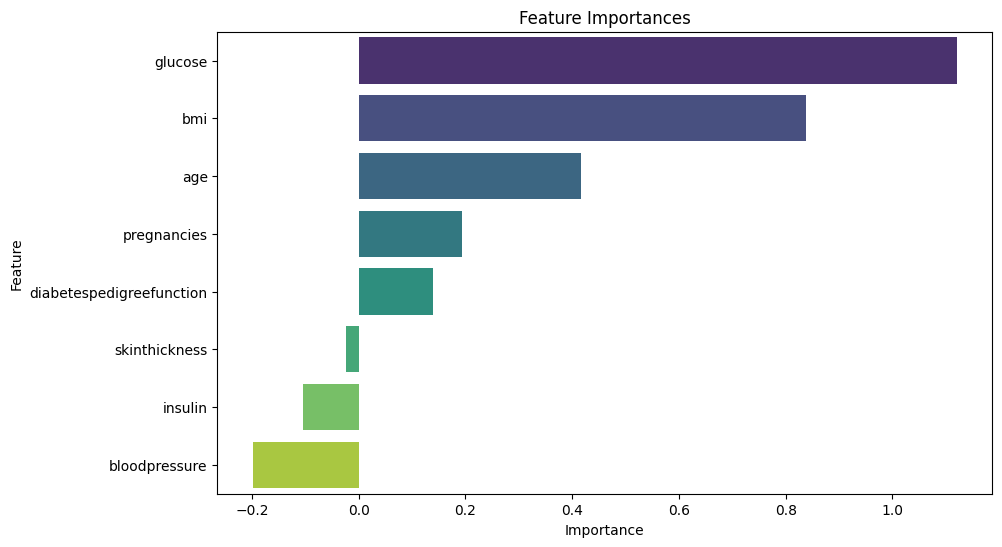

In [28]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Drop some features 

In [31]:
X.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age'],
      dtype='object')

In [32]:
X = df.drop([label,'bloodpressure', 'skinthickness','insulin'],axis=1)
y = df[label]

In [33]:
scaler = StandardScaler()
model_X = scaler.fit(X)
X_scaled = model_X.transform(X)

X_train, X_test, y_train, y_test = train_test_split (X_scaled, y, random_state=42, test_size=0.3, shuffle=True)

In [34]:
log_reg = linear_model.LogisticRegression(solver = 'lbfgs', max_iter = 1000)

#train the model using training set
log_reg.fit(X_train, y_train)

#making predictions on the testing set
y_pred = log_reg.predict(X_test)

#printing accuracy of algorithm
print("Logistic Regression Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Logistic Regression Model Accuracy (in %): 73.59307359307358
